In [1]:
# allow plots to be interactive in the notebook
%matplotlib notebook
# import plotting library
import matplotlib.pyplot as plt
# import NextsimBin class for opening *bin files
from pynextsim.nextsim_bin import NextsimBin

In [2]:
!ls /data/experiments/run_330d_nodebug


Moorings.nc		     mesh_20060201T000000Z.bin
SIDFEx_Drifters_20060202.nc  mesh_20060201T000000Z.dat
bbm_control.cfg		     mesh_20060201T060000Z.bin
field_20060201T000000Z.bin   mesh_20060201T060000Z.dat
field_20060201T000000Z.dat   mesh_20060201T120000Z.bin
field_20060201T060000Z.bin   mesh_20060201T120000Z.dat
field_20060201T060000Z.dat   mesh_20060201T180000Z.bin
field_20060201T120000Z.bin   mesh_20060201T180000Z.dat
field_20060201T120000Z.dat   mesh_20060202T000000Z.bin
field_20060201T180000Z.bin   mesh_20060202T000000Z.dat
field_20060201T180000Z.dat   mesh_20060202T060000Z.bin
field_20060202T000000Z.bin   mesh_20060202T060000Z.dat
field_20060202T000000Z.dat   mesh_20060202T120000Z.bin
field_20060202T060000Z.bin   mesh_20060202T120000Z.dat
field_20060202T060000Z.dat   mesh_20060202T180000Z.bin
field_20060202T120000Z.bin   mesh_20060202T180000Z.dat
field_20060202T120000Z.dat   mesh_20060203T000000Z.bin
field_20060202T180000Z.bin   mesh_20060203T000000Z.dat
field_20060202T180000Z.dat  

In [3]:
# open an example file
nb = NextsimBin('/data/experiments/run_330d_nodebug/field_final.bin')

In [4]:
# print date of the file
nb.datetime

datetime.datetime(2006, 12, 28, 0, 0)

In [5]:
# print list of variables
nb.variables

['Time',
 'M_nb_regrid',
 'Element_area',
 'M_VT',
 'M_dirichlet_flags',
 'M_wind',
 'Damage',
 'Ridge_ratio',
 'Concentration_update',
 'Tice_0',
 'Tice_1',
 'Tice_2',
 'SST',
 'SSS',
 'Fyi_fraction',
 'Age_d',
 'Age',
 'Concentration',
 'Thickness',
 'Snow',
 'Sigma_0',
 'Sigma_1',
 'Qassim',
 'Dmax']

<IPython.core.display.Javascript object>


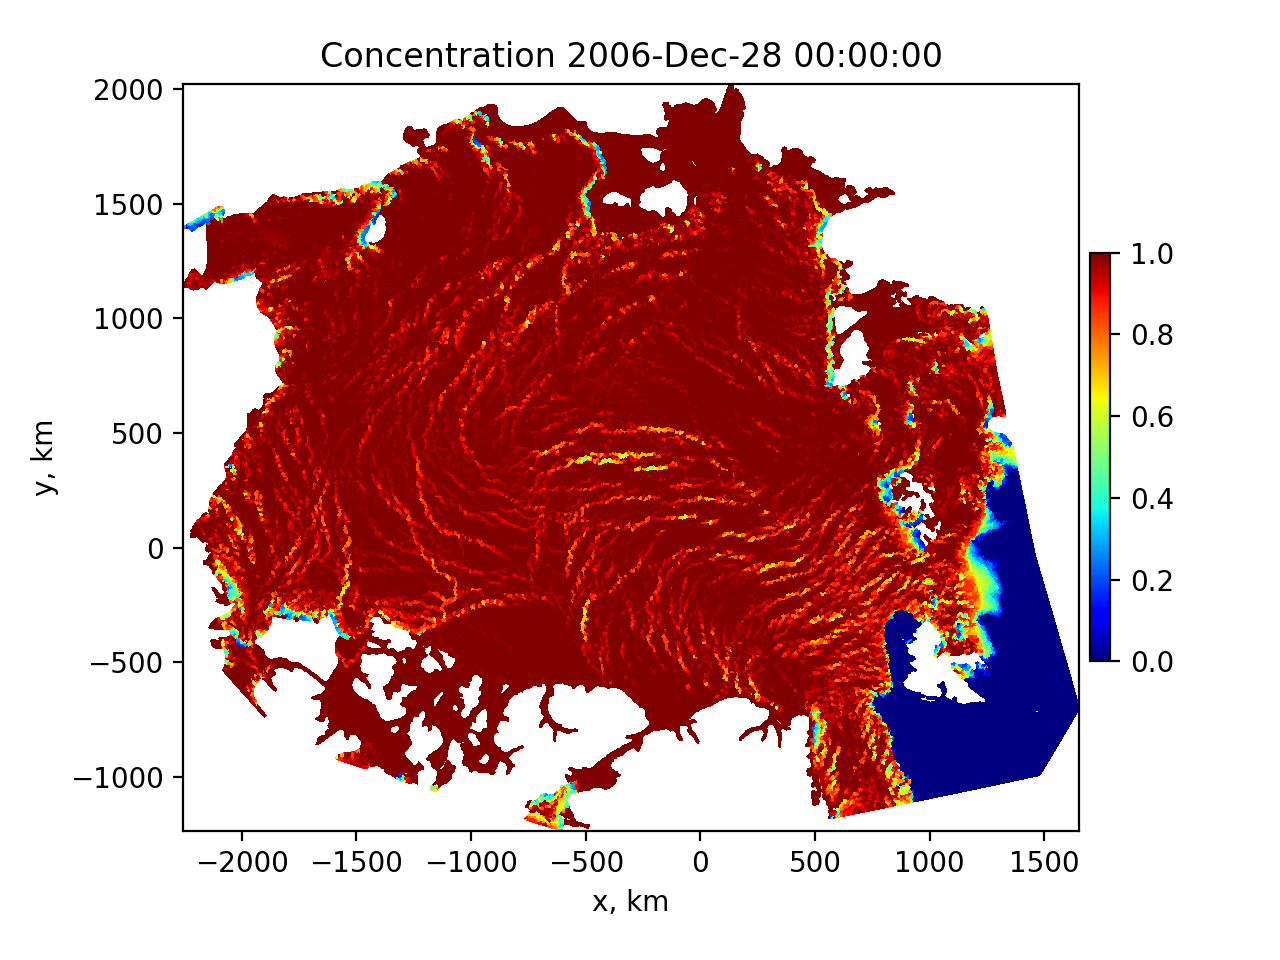

<AxesSubplot:title={'center':'Concentration 2006-Dec-28 00:00:00'}, xlabel='x, km', ylabel='y, km'>

In [6]:
# plot SIC on the neXtSIM mesh
nb.plot_var('Concentration')

<IPython.core.display.Javascript object>


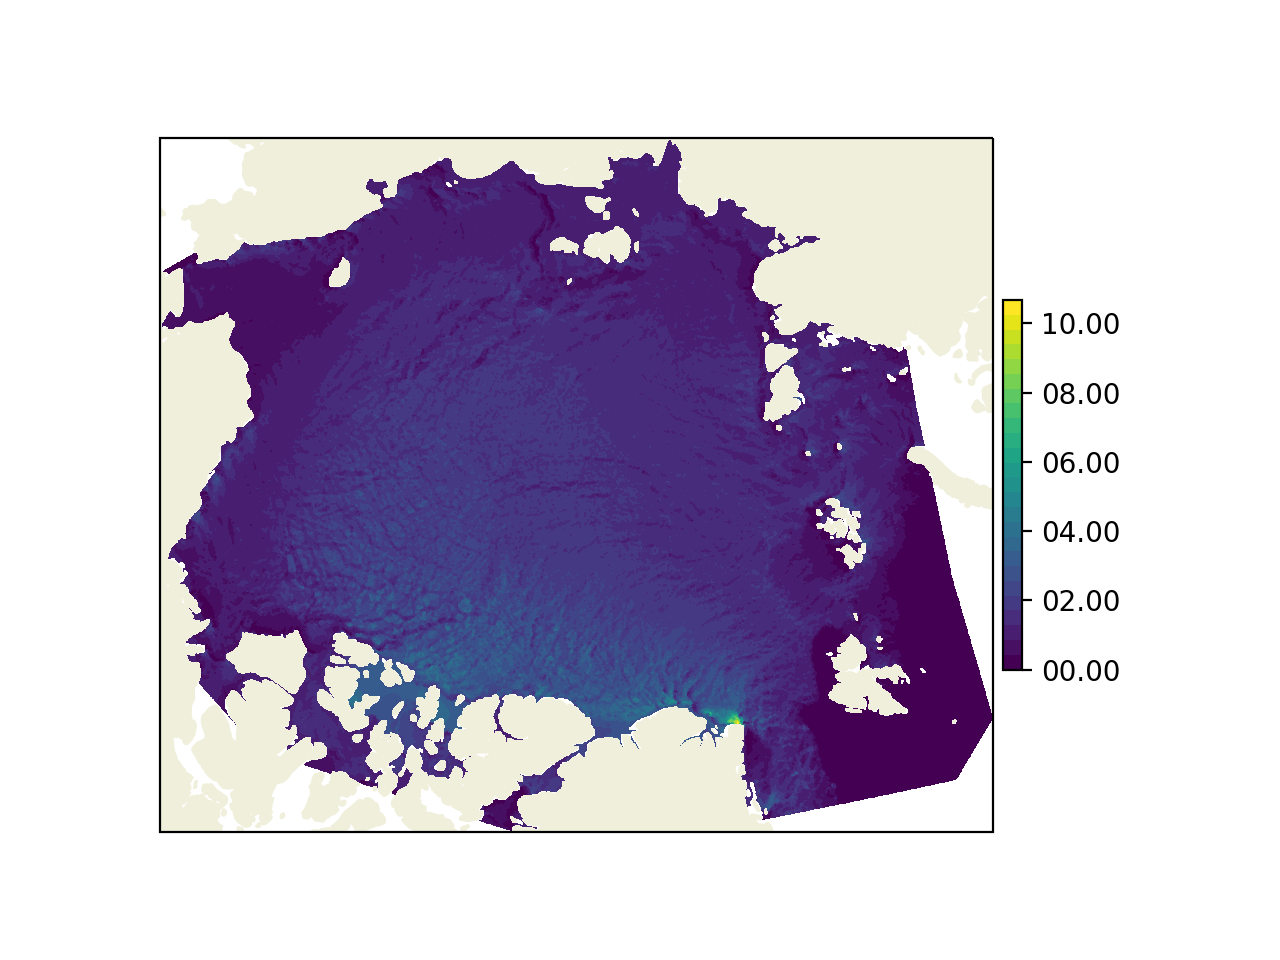

In [7]:
# plot thickness on a 2D grid with spatial resolution 2km and neXtSIM projection (polar stereographic)
nb.imshow('Thickness', pixel_size=2000)

In [ ]:
# plot SIC from OSISAF
nb.plot_external_data('/input_obs_data/OSISAF_ice_conc/polstere/2018_nh_polstere/ice_conc_nh_polstere-100_multi_201802021200.nc',
                     'ice_conc')

In [ ]:
# get SIC from osisaf on neXtSIM mesh elements
c_osisaf = nb.get_external_data('/input_obs_data/OSISAF_ice_conc/polstere/2018_nh_polstere/ice_conc_nh_polstere-100_multi_201802021200.nc',
                     'ice_conc')

In [ ]:
# get SIC from neXtSIM
c_nextsim = nb.get_var('Concentration')

In [ ]:
# scatterplot
plt.figure()
plt.plot(c_nextsim, c_osisaf/100, '.')
plt.xlabel('neXtSIM')
plt.ylabel('OSISAF')
plt.show()

In [ ]:
### AUTOMATE finding external data

# 1. import Openers: classes for finding and accessing sources of external data
# one for TOPAZ (ocean model)
# another for AMSR2 (high-res satellite SIC)
from pynextsim.openers import OpenerTopaz4F, OpenerAmsr2Conc

In [ ]:
# 2. create TOPAZ opener
o1 = OpenerTopaz4F(nb.datetime, 1)
# use the opener to automatically find TOPAZ filename for a given date
filename = o1.find(nb.datetime)
# use the opener to automatically get variable name in TOPAZ file that corresponds to neXtSIM 'Concentration'
varname = o1.variables['Concentration'].name
# get SIC from TOPAZ
c_topaz = nb.get_external_data(filename, varname)

In [ ]:
# 3. create AMSR2 opener
o2 = OpenerAmsr2Conc()
# use the opener to automatically find AMSR2 filename for a given date
filename = o2.find(nb.datetime)
# use the opener to automatically get variable name in AMSR2 file that corresponds to neXtSIM 'Concentration'
varname = o2.variables['Concentration'].name
# get SIC from AMSR2
c_amsr2 = nb.get_external_data(filename, varname)

In [ ]:
# messy scatterplot for comparison of four SIC products
plt.figure()
plt.plot(c_nextsim, c_osisaf/100, '.', label='OSISAF')
plt.plot(c_nextsim, c_topaz, '.', label='TOPAZ')
plt.plot(c_nextsim, c_amsr2/100, '.', label='AMSR2')
plt.xlabel('neXtSIM')
plt.ylabel('OSISAF, TOPAZ, AMSR2')
plt.legend()
plt.show()